In [1]:
from ROOT import *
from PlotUtils import *
import math

DEBUG=True

gStyle.SetPaintTextFormat("4.1f")

laterals = ["BeamAngleX","BeamAngleY","Muon_Energy_Resolution","Muon_Energy_MINERvA","Muon_Energy_MINOS"]#,"geant4","response"]
vars = ["EnuCCQE","pzmu","ptmu","Q2QE"]

#vars = ["ptmu"]

f = TFile.Open("$HOME/Dropbox/BIGMAT/CCQENu/make_hists/CCQENu_minervame5A_MnvTunev2_QElike_Test_1.root")

#f = TFile.Open("$HOME/Dropbox/ccqe/check_v2/check_v2.root")#/CCQENu_minervame5A_MnvTunev2_QElike_Test_1.root")

TUNED=False
if TUNED:
    tuned="_tuned"
else:
    tuned = ""

log = open("values.txt",'w')

if not os.path.exists("pix"):
    os.mkdir("pix")
    
if not os.path.exists("panel"):
    os.mkdir("panel")

def getBand1D(h,name,number):
    if name == "CV":
        hist = TH1D()
        hist = TH1D(h.Clone(h.GetName()+"_CV"))
        return hist
    if DEBUG: print (h.GetName(),name,number)
    errorband = MnvVertErrorBand()
    errorband = h.GetVertErrorBand(name)
    nmax = errorband.GetNHists()
    print ("bandname",name)
    if number >= nmax:
        print ("asked for non-existent universe",name,number,nmax)
        return None
    hist = TH1D()
    newname = "%s_%s_%d"%(h.GetName(),name,number)
    hist = errorband.GetHist(number).Clone(newname)
    return hist

def getBand2D(h,name,number):
    if name == "CV":
        hist = TH2D()
        hist = TH2D(h.Clone(h.GetName()+"_CV"))
        return hist
    errorband = MnvVertErrorBand2D()
    errorband = h.GetVertErrorBand(name)
    hist = TH1D()
    newname = "%s_%s_%s"%(h.GetName(),name,number)
    hist = errorband.GetHist(number).Clone(newname)
    return hist

def makeWeight1D(h,name,number):
    den = TH1D()
    num = TH1D()
    wt = TH1D()
    den = h.GetCVHistoWithStatError()
    num = getBand1D(h,name,number)
    wt = num.Clone(num.GetName()+"_weights")
    wt.Divide(num,den,1.,1.,"B")
    return wt

def makeWeight2D(h,name,number):
    den = TH2D()
    num = TH2D()
    wt = TH2D()
    den = h.GetCVHistoWithStatError()
    num = getBand2D(h,name,number)
    wt = num.Clone(num.GetName()+"_weight")
    wt.Divide(num,den,1.,1.,"B")
    return wt



def drawme1D(h):
    n = "c_"+h.GetName()
    c = TCanvas(n,n)
    h.Draw("PE")
    c.Draw()
    c.Print("pix/"+n+".pdf")
    return c
    
def drawme2D(h):
    n = "c_"+h.GetName()
    c = TCanvas(n,n)
    h.Draw("COLZ")
    h.Draw("TEXT SAME")
    c.Draw()
    c.Print("pix/"+n+".pdf")
    return c
    
def deweight(h1, h2):
    hnew = MnvH2D()
    hnew = h2.Clone(h2.GetName()+"_deweight")
    hnew.Reset()
    for x in range(0,h2.GetXaxis().GetNbins()+2):
        for y in range(0,h2.GetYaxis().GetNbins()+2):
            dw = h1.GetBinContent(y)
            if (dw != 0):
                new = h2.GetBinContent(x,y)/dw
                newerr = h2.GetBinError(x,y)/dw
            else:
                new = 1.0
                newerr = 0.0
            #print (x,y, h2.GetBinContent(x,y), dw, new)
            hnew.SetBinContent(x,y,new)
            hnew.SetBinError(x,y,newerr)
    return hnew

def doweight(h1, h2):
    hnew = TH2D()
    hnew = TH2D(h2.Clone(h2.GetName()+"_addweight"))
    hnew.Reset()
    for x in range(0,h2.GetXaxis().GetNbins()+2):
        for y in range(0,h2.GetYaxis().GetNbins()+2):
            dw = h1.GetBinContent(y)
            if (dw != 0):
                new = h2.GetBinContent(x,y)*dw
                
            else:
                new = 1.0
            #print (x,y, h2.GetBinContent(x,y), dw, new)
            hnew.SetBinContent(x,y,new)
            hnew.SetBinError(x,y,0.0)
    return hnew

Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::ChainWrapper found in libplotutils.dylib  is already in libMATDict.so 
Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::GridCanvas found in libplotutils.dylib  is already in libMATDict.so 
Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::MnvH1D found in libplotutils.dylib  is already in libMATDict.so 
Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::MnvH2D found in libplotutils.dylib  is already in libMATDict.so 
Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::MnvH3D found in libplotutils.dylib  is already in libMATDict.so 
Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::MnvLatErrorBand found in libplotutils.dylib  is already in libMATDict.so 
Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::MnvLatErrorBand2D found in libplotutils.dylib  is already in libMATDict.so 
Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::MnvLatErrorBand3D f

Welcome to JupyROOT 6.24/02


In [2]:
def newband2D(bandin):
   
    bandin = newvert.GetNHists()
     
    for n in range(0,nuniv):
        
        nx= th2.GetXaxis().GetNbins()
        ny= th2.GetYaxis().GetNbins()
        for x in range(0,nx+2):
            for y in range(0,ny+2):
                if x == 2 and y == 2:
                    print ("before",replacement.GetVertErrorBand(name).GetHist(n).GetBinContent(x,y))
                replacement.GetVertErrorBand(name).GetHist(n).SetBinContent(x,y,th2.GetBinContent(x,y))
                if x == 2 and y == 2:
                    print ("after",replacement.GetVertErrorBand(name).GetHist(n).GetBinContent(x,y))
    return replacement
                       

In [3]:
def getStats2D(h):
    nx = h.GetXaxis().GetNbins()
    ny = h.GetYaxis().GetNbins()
    sum1 = 0.0
    sum2 = 0.0
     
    sumwt = 0.0
    for x in range(1,nx+1):
        for y in range(1,ny+1):
            val = h.GetBinContent(x,y)
            err = h.GetBinError(x,y)
            if err == 0: continue
            if err > 2.0: continue
            wt = 1./(err*err)
            sum1 += val*wt
            sum2 += val*val*wt
            sumwt += wt
            
            #print ("check",x,y,val,err,wt,sum1,sum2,sumwt)
    if sumwt != 0:
        mean = sum1/sumwt
        if sum2/sumwt > mean*mean:
            std = math.sqrt((sum2/sumwt)-mean*mean)
        else:
            std = math.sqrt(-(sum2/sumwt)+mean*mean)
        #print ("result",mean,std)
        return (mean,std)
    else:
        return (0,0)
    
    

{ "BeamAngleX", "BeamAngleY", "Flux", "GEANT_Neutron", "GEANT_Pion", "GEANT_Proton", "GENIE_AGKYxF1pi", "GENIE_AhtBY", "GENIE_BhtBY", "GENIE_CCQEPauliSupViaKF", "GENIE_CV1uBY", "GENIE_CV2uBY", "GENIE_EtaNCEL", "GENIE_FrAbs_N", "GENIE_FrAbs_pi", "GENIE_FrCEx_N", "GENIE_FrCEx_pi", "GENIE_FrElas_N", "GENIE_FrElas_pi", "GENIE_FrInel_N", "GENIE_FrPiProd_N", "GENIE_FrPiProd_pi", "GENIE_MFP_N", "GENIE_MFP_pi", "GENIE_MaNCEL", "GENIE_MaRES", "GENIE_MvRES", "GENIE_NormDISCC", "GENIE_NormNCRES", "GENIE_RDecBR1gamma", "GENIE_Rvn1pi", "GENIE_Rvn2pi", "GENIE_Rvp1pi", "GENIE_Rvp2pi", "GENIE_Theta_Delta2Npi", "GENIE_VecFFCCQEshape", "Low_Recoil_2p2h_Tune", "MINOS_Reconstruction_Efficiency", "Muon_Energy_MINERvA", "Muon_Energy_MINOS", "Muon_Energy_Resolution", "RPA_HighQ2", "RPA_LowQ2", "response_em", "response_meson", "response_other", "response_proton" }
skip lateral band BeamAngleX
skip lateral band BeamAngleY
band check Name: h___QElike___qelike___EnuCCQE___selected_truth Title: EnuCCQE NbinsX: 14

Info in <TCanvas::Print>: pdf file pix/c_h___QElike___qelike___EnuCCQE___response_migration_CV.pdf has been created
Info in <TCanvas::Print>: pdf file pix/c_h___QElike___qelike___EnuCCQE___selected_truth_Flux_0_weight.pdf has been created
Info in <TCanvas::Print>: pdf file pix/c_h___QElike___qelike___EnuCCQE___response_migration_Flux_0_weight.pdf has been created
Info in <TCanvas::Print>: pdf file panel/wt3_EnuCCQE_Flux_0_px.pdf has been created
Info in <TCanvas::Print>: pdf file pix/c_h___QElike___qelike___EnuCCQE___response_migration_Flux_0_weight_deweight.pdf has been created
Info in <TCanvas::Print>: pdf file pix/c_h___QElike___qelike___EnuCCQE___selected_truth_Flux_1_weight.pdf has been created
Info in <TCanvas::Print>: pdf file pix/c_h___QElike___qelike___EnuCCQE___response_migration_Flux_1_weight.pdf has been created
Info in <TCanvas::Print>: pdf file panel/wt3_EnuCCQE_Flux_1_px.pdf has been created
Info in <TCanvas::Print>: pdf file pix/c_h___QElike___qelike___EnuCCQE___respons

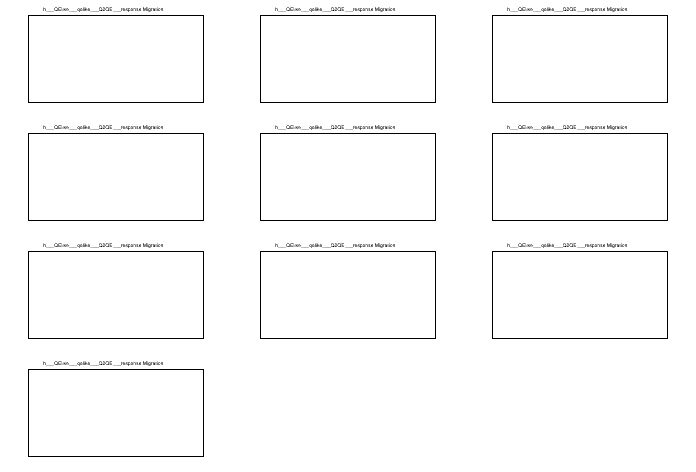

In [4]:



g = TFile.Open("output2.root","RECREATE")

# loop over variables

for var in vars:
    selt = MnvH1D()
    selr = MnvH2D()
    selt = f.Get("h___QElike___qelike___%s___selected_truth%s"%(var,tuned))
    selt.Print()

    selr = f.Get("h___QElike___qelike___%s___response%s_migration"%(var,tuned))

    bandcv = getBand1D(selt,"CV",0)
    cv1d = getBand2D(selr,"CV",0)
    drawme2D(cv1d)
    bands = selt.GetVertErrorBandNames()
    print (bands)
    for band in bands:
        if band in laterals:
            print ("skip lateral band",band)
            continue
        theband = selt.GetVertErrorBand(band)
        print ("band check",theband)
        nuniv = theband.GetNHists()
        
        
        for univ in range(0,nuniv):
            band1 = getBand1D(selt,band,univ)
            if band1 == None:
                continue
            band1.Print()

            wt = MnvH1D()
            wt = band1.Clone(band1.GetName()+"_weight")
            wt.Divide(wt,bandcv,1.,1.,"B")

            wt.SetMaximum(1.2)
            wt.SetMinimum(0.8)

            c = drawme1D(wt).Draw()
            #c.Draw()
            

            wt.Print()

            selr.Print()

            wt2 = makeWeight2D(selr,band,univ)
            wt2.SetMaximum(1.2)
            wt2.SetMinimum(0.8)
            #wt2.Print("ALL")



            band1r = getBand2D(selr,band,univ)

            #drawme2D(cv1d)
            #drawme2D(band1r)

            gStyle.SetPaintTextFormat("4.4f")

            drawme2D(wt2)

            wt3=deweight(wt, wt2)

            ny = wt3.GetYaxis().GetNbins()

            proj = {}
            proj2 = {}


            can = TCanvas("wt3_%s_%s_%d_px"%(var,band,univ),"w3_%s_%s_%d_px"%(var,band,univ))
            nxpanes = 3
            nypanes = int(ny/nxpanes)+1
            can.Divide(nxpanes,nypanes)
            pad = {}
            pad = 0
            wt3.GetYaxis().SetNdivisions(5, 0, 0, True);
            gStyle.SetOptStat(1)
             
            (mean2,range2) = getStats2D(wt2)
            (mean3,range3) = getStats2D(wt3)
            
            s = "%10s %10s %35s %d old %6.4f +- %6.4f new %6.4f +- %6.4f\n"%(tuned,var,band,univ,mean2,range2,mean3,range3)
            print ("log",s)
            log.write(s)
            
            # print out the slices (use projection to slice)
            for bin in range(1,ny+2):
                pad += 1
                can.cd(pad)
                proj2[bin] = wt2.ProjectionX("w2_%s_%s%d_%d_px"%(var,band,univ,bin),bin,bin)
                proj[bin] = wt3.ProjectionX("w3_%s_%s%d_%d_px"%(var,band,univ,bin),bin,bin)
                proj[bin].GetYaxis().SetNdivisions(2, 5, 0, True);
                proj[bin].GetYaxis().SetLabelSize(0.1)
                proj[bin].GetXaxis().SetNdivisions(ny, 2, True);
                proj[bin].GetXaxis().SetLabelSize(0.1)
                proj[bin].SetTitleSize(0.2)
                proj[bin].SetMarkerStyle(20)
                proj[bin].SetMarkerSize(.5)
                proj[bin].SetMaximum(1.2)
                proj[bin].SetMinimum(0.8)
                proj[bin].Draw("hist p")
                proj2[bin].SetMarkerStyle(21)
                proj2[bin].SetMarkerSize(.5)
                proj2[bin].Draw("pe same")

            can.Draw()
            can.Print("panel/wt3_%s_%s_%d_px.pdf"%(var,band,univ))


            #fake = MnvH2D()
            #fake = pseudoResponse(selr)
            #drawme2D(fake)

            #wt3.Print("ALL")
            drawme2D(wt3)

            
            wt2.Write()
            wt3.Write()
g.Close()
log.close()
